# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from pandas.core.common import flatten

import nltk
from nltk.corpus import stopwords
from nltk.corpus import brown
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.util import ngrams
from collections import Counter
import string

# if you have not downloaded nltk package before
# then please uncomment line below to download it
# nltk.download()

stopwords = nltk.corpus.stopwords.words('english')

### Loading the Brown corpus data from NLTK

In [2]:
categories = brown.categories()
print(sorted(categories))

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [3]:
# part(a) - creating a pandas dataframe with given columns
data = {'category_name': [],
        'count_words': [],
        'count_sentences':[],
        'count_paragraphs' : [],
        'common_words': []      
       }
brown_corpus = pd.DataFrame(data)

# part(b) - filling the dataframe with values
categories = [category for category in brown.categories()]
count_words = [len(brown.words(categories=str(i))) for i in brown.categories()]
count_sentences = [len(brown.sents(categories=str(i))) for i in brown.categories()]
count_paragraphs = [len(brown.paras(categories=str(i))) for i in brown.categories()]
common_words = []
for x in brown.categories():
    single_category_most_common = []
    ten_most_common = FreqDist(brown.words(categories=str(x))).most_common(10)
    for key, value in ten_most_common:
        single_category_most_common.append(key)
    common_words.append(single_category_most_common)
# inserting the values into the dataframe
brown_corpus["category_name"] = categories
brown_corpus["count_words"] = count_words
brown_corpus["count_sentences"] = count_sentences
brown_corpus["count_paragraphs"] = count_paragraphs
brown_corpus["common_words"] = common_words

# Part(c) - adding 'common_words_after_preprocessing' column
common_words_after_preprocessing = []
# get the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
for category in brown.categories():  
    #first we want to exclude punctuations from words by checking if they are alphanumeric
    words = [word.lower() for word in brown.words(categories=str(category)) if word.isalnum()]
    # we then remove stopwords
    words_without_stopwords= [x for x in words if x.lower() not in stopwords]
    # then we find the 10 most frequent words
    ten_most_common = [str(i[0]) for i in FreqDist(words_without_stopwords).most_common(10)]
    common_words_after_preprocessing.append(ten_most_common)
brown_corpus["common_words_after_preprocessing"] = common_words_after_preprocessing

# Part(d) - printing the first 10 rows 
brown_corpus.head(10)

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing
0,adventure,69342,4637,1387,"[., ,, the, and, a, of, to, ``, '', was]","[said, would, one, back, man, could, like, tim..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[one, would, new, time, man, even, may, could,..."
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[would, one, new, united, may, people, america..."
3,fiction,68488,4249,1043,"[,, ., the, and, to, of, a, was, in, he]","[would, said, one, could, like, man, back, tim..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[state, year, states, may, united, new, develo..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, to, a, in, is, for]","[one, new, may, time, first, many, two, also, ..."
6,humor,21695,1053,254,"[,, the, ., of, and, a, to, ``, '', in]","[said, one, would, time, even, like, could, wa..."
7,learned,181888,7734,1418,"[the, ,, of, ., and, to, in, a, is, that]","[af, one, may, would, two, first, 1, also, tim..."
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[one, would, time, may, new, first, could, peo..."
9,mystery,57169,3886,1164,"[., ,, the, to, and, a, of, was, ``, '']","[said, would, one, back, could, like, man, get..."


## Applying NLP operations on the corpus

### Stemming

In [4]:
raw_news = brown.words(categories=['news'])

# part(a) - removing stopwords and punctuation
stopwords = nltk.corpus.stopwords.words('english')
news_words_stop = [word for word in raw_news if word.lower() not in stopwords]
news_words = [word.lower() for word in news_words_stop if word.isalnum()]

# part(b) - number of unique words
unique_news_words = set(news_words)
print("-"*50)
print(f"The number of unique words in 'news_words' are: {len(unique_news_words)}")

#part(c) - applying "PorterStemmer"
stemmer = PorterStemmer()
after_porter_stemmer = [stemmer.stem(word) for word in news_words]
print(f"After applying 'PorterStemmer', the number of unique words "
      f"in 'news_words' are: {len(set(after_porter_stemmer))}")
print("-"*50)

--------------------------------------------------
The number of unique words in 'news_words' are: 11364
After applying 'PorterStemmer', the number of unique words in 'news_words' are: 8049
--------------------------------------------------


In [5]:
raw_fiction = brown.words(categories=['fiction'])

# part(a) - removing stopwords and punctuation
fiction_without_stop = [word for word in raw_fiction if word.lower() not in stopwords]
fiction_words = [word.lower() for word in fiction_without_stop if word.isalnum()]

# part(b) - number of unique words
unique_fiction_words = set(fiction_words)
print("-"*50)
print(f"The number of unique 'fiction' words before applying 'SnowballStemmer' "
      f"are: {len(unique_fiction_words)}")

#part(c) - applying "SnowballStemmer"
stemmer = SnowballStemmer(language='english')
after_snowball_stemmer = [stemmer.stem(word) for word in fiction_words]
print(f"After applying 'SnowballStemmer', The number of unique 'fiction' words"
      f" are: {len(set(after_snowball_stemmer))}")
print("-"*50)

--------------------------------------------------
The number of unique 'fiction' words before applying 'SnowballStemmer' are: 8029
After applying 'SnowballStemmer', The number of unique 'fiction' words are: 5806
--------------------------------------------------


### Lemmatization

In [6]:
raw_government = brown.words(categories=['government'])
government_words_stop = [word for word in raw_government if word.lower() not in stopwords]
government_words = [word.lower() for word in government_words_stop if word.isalnum()] 

# number of unique words
unique_government_words = set(government_words)
print("-"*50)
print(f"The number of unique words in 'government' before lemmatization is: {len(unique_government_words)}")

# applying 'WordNetLemmatizer'
lemmatizer = WordNetLemmatizer()
after_lemmatization = [stemmer.stem(word) for word in unique_government_words]
print(f"After applying WordNetLemmatizer, I have {len(set(after_lemmatization))} 'government' words")
print("-"*50)

--------------------------------------------------
The number of unique words in 'government' before lemmatization is: 6550
After applying WordNetLemmatizer, I have 4208 'government' words
--------------------------------------------------


### Finding synonyms and antonyms

In [7]:
# getting the required column
processed_words_column = brown_corpus["common_words_after_preprocessing"]

# part(a) - adding "synonyms" and "antonyms" columns 
brown_corpus["synonyms"] = ""
brown_corpus["antonyms"] = ""

# part(b) - calculating synonyms
def get_synonyms(list_of_words):
    list_of_synonyms = []
    for word in list_of_words:
        synonyms = wordnet.synsets(str(word))
        # get list of all synonym words for a particular word
        list_of_lemmas = list(set(flatten([word.lemma_names() for word in synonyms])))
        list_of_synonyms.extend(list_of_lemmas)
    return list_of_synonyms

brown_corpus["synonyms"] = (processed_words_column
                            .apply(lambda word_list: get_synonyms(word_list)))

# part(c) - calculating antonyms
def get_antonyms(list_of_words):
    list_of_antonyms = []
    for word in list_of_words:
        synonyms = wordnet.synsets(str(word))
        all_lemmas = []
        for syn_word in synonyms:
            # if the word has any antonyms then we get it
            list_of_lemmas = [lemma.antonyms()[0].name() for lemma in syn_word.lemmas()
                              if lemma.antonyms()]
            all_lemmas.append(list_of_lemmas)   
        list_of_antonyms.extend(list(set(flatten(all_lemmas))))
    return list_of_antonyms
       
brown_corpus["antonyms"] = (processed_words_column
                            .apply(lambda word_list: get_antonyms(word_list)))

brown_corpus.head(10)

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,adventure,69342,4637,1387,"[., ,, the, and, a, of, to, ``, '', was]","[said, would, one, back, man, could, like, tim...","[suppose, enunciate, aver, pronounce, enounce,...","[front, forward, ahead, advance, veer, civilia..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[one, would, new, time, man, even, may, could,...","[unitary, one, unmatchable, unrivalled, matchl...","[worn, old, civilian, woman, uneven, odd, midd..."
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[would, one, new, united, may, people, america...","[unitary, one, unmatchable, unrivalled, matchl...","[worn, old, divided, divide, disunify, middle,..."
3,fiction,68488,4249,1043,"[,, ., the, and, to, of, a, was, in, he]","[would, said, one, could, like, man, back, tim...","[suppose, enunciate, aver, pronounce, enounce,...","[unlike, dislike, unalike, civilian, woman, fr..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[state, year, states, may, united, new, develo...","[commonwealth, put_forward, DoS, State, tell, ...","[divided, divide, disunify, worn, old, devolut..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, to, a, in, is, for]","[one, new, may, time, first, many, two, also, ...","[unitary, one, unmatchable, unrivalled, matchl...","[worn, old, middle, last, second, few, evilnes..."
6,humor,21695,1053,254,"[,, the, ., of, and, a, to, ``, '', in]","[said, one, would, time, even, like, could, wa...","[suppose, enunciate, aver, pronounce, enounce,...","[uneven, odd, unlike, dislike, unalike]"
7,learned,181888,7734,1418,"[the, ,, of, ., and, to, in, a, is, that]","[af, one, may, would, two, first, 1, also, tim...","[unitary, one, unmatchable, unrivalled, matchl...","[middle, last, second]"
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[one, would, time, may, new, first, could, peo...","[unitary, one, unmatchable, unrivalled, matchl...","[worn, old, middle, last, second, few]"
9,mystery,57169,3886,1164,"[., ,, the, to, and, a, of, was, ``, '']","[said, would, one, back, could, like, man, get...","[suppose, enunciate, aver, pronounce, enounce,...","[front, forward, ahead, advance, veer, unlike,..."


### Bigrams and trigrams

In [8]:
brown_paras = brown.paras()
last_fivehundred_paras = brown_paras[-500:]

In [9]:
# The methodology followed when computing bigrams
# For this exercise when computing valid bigrams I have first worked out the bigrams then 
# removed the bigrams that have stopwords in them and thereafter removed bigrams that have
# puctuation in them. this is to ensure that we take into account all the tokens when computing
# bigrams and only remove stopwords and punctions after that. so two words that are separated by
# a puctuation will not be included. note that if we had removed puctuation before computing bigrams
# them words separated by a puctuations would be falsely classfied as a valid bigram, same reasoning 
# applied to stopwords.
def get_bigrams_frequency(list_of_paras):
    list_of_bigrams = []
    for paras in list_of_paras:
        l3 = []
        for sentence in paras:
            bgrams = ngrams(sentence, 2)
            # transform all bigram words in lower case for search
            bgrams_lc = [(item1.lower(), item2.lower()) for item1,item2 in bgrams]
            # list comprehension adapted from: #https://stackoverflow.com/questions/57920423/
            bg_without_stopwords = [word for word in bgrams_lc if not 
                                    any(i.lower() in word for i in stopwords)]
            ## all punctuation form "string" module as well as their repetitions. 
            all_punctuation = ([i for i in string.punctuation]+
                              [str(f"{char+char}") for char in string.punctuation])
            # we get all valid bigram that exclude both stopwords and puctuation marks.
            valid_bigrams = [bg for bg in bg_without_stopwords if not
                             any(i in bg for i in all_punctuation)]
            l3.extend(valid_bigrams)
        list_of_bigrams.extend(l3)
    #get a dict of bigrams and their frequencies
    dict_of_bigrams = Counter(list_of_bigrams)
    return dict(dict_of_bigrams)
         
# print(get_bigrams_frequency(last_fivehundred_paras))    

In [10]:
brown_bigrams = get_bigrams_frequency(last_fivehundred_paras)         

In [11]:
# printing the 15 most frequent occurring bigrams in 'brown_bigrams'
print("-"*50)
print(Counter(brown_bigrams).most_common(15))
print("-"*50)

--------------------------------------------------
[(('years', 'ago'), 9), (('mr.', 'crombie'), 9), (('new', 'york'), 8), (('mr.', 'blatz'), 8), (('mr.', 'willis'), 7), (('mr.', 'gorboduc'), 7), (('hanford', 'college'), 6), (('one', 'day'), 5), (('next', 'morning'), 5), (('mr.', 'partlow'), 5), (('long', 'enough'), 5), (('general', 'burnside'), 5), (('phil', 'said'), 4), (('frankie', 'said'), 4), (('samuel', 'burns'), 4)]
--------------------------------------------------


## Visualisation

### Barplots

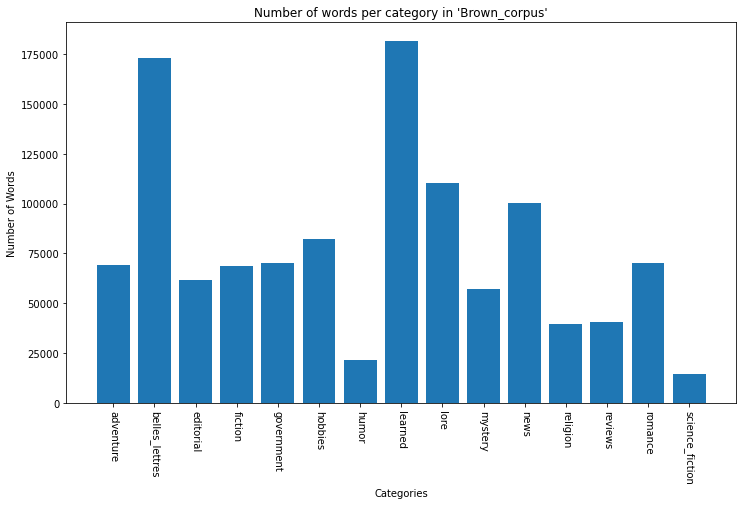

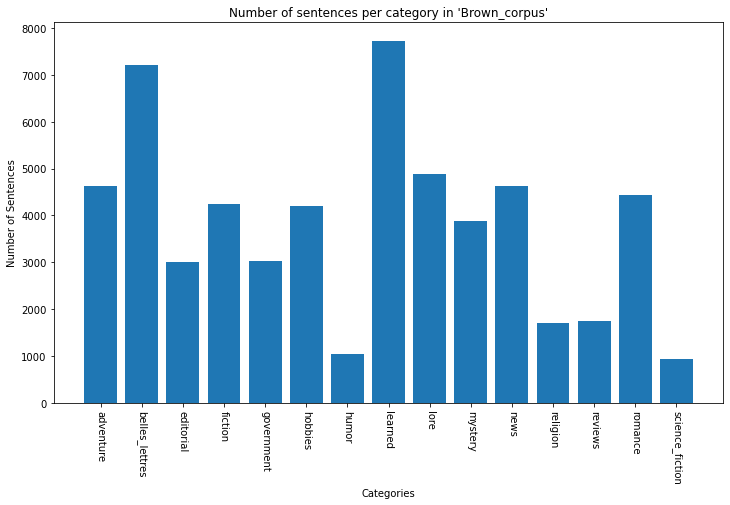

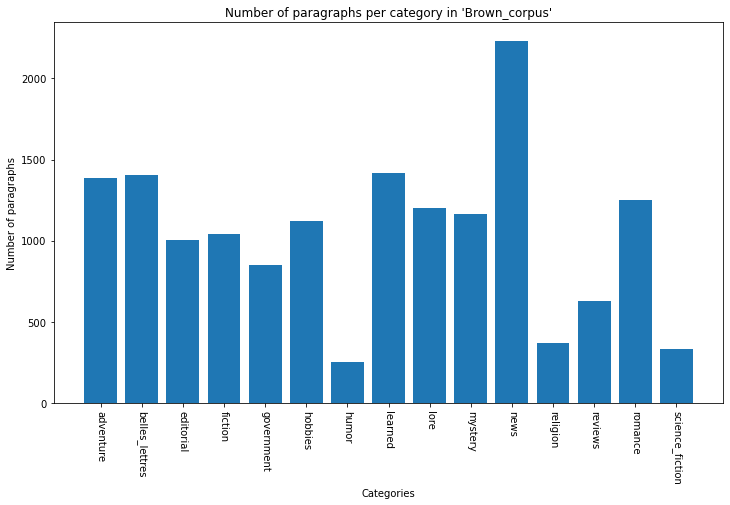

In [12]:
# 1- number of words barplot
plt.figure(figsize=(12,7))
plt.bar(brown_corpus["category_name"], brown_corpus["count_words"])
plt.xlabel("Categories")
plt.ylabel("Number of Words")
plt.title("Number of words per category in 'Brown_corpus'")
plt.xticks(rotation=-90)
plt.show()

# 2- number of sentences barplot
plt.figure(figsize=(12,7))
plt.bar(brown_corpus["category_name"], brown_corpus["count_sentences"])
plt.xlabel("Categories")
plt.ylabel("Number of Sentences")
plt.title("Number of sentences per category in 'Brown_corpus'")
plt.xticks(rotation=-90)
plt.show()

#3- number of paragraphs barplot
plt.figure(figsize=(12,7))
plt.bar(brown_corpus["category_name"], brown_corpus["count_paragraphs"])
plt.xlabel("Categories")
plt.ylabel("Number of paragraphs")
plt.title("Number of paragraphs per category in 'Brown_corpus'")
plt.xticks(rotation=-90)
plt.show()

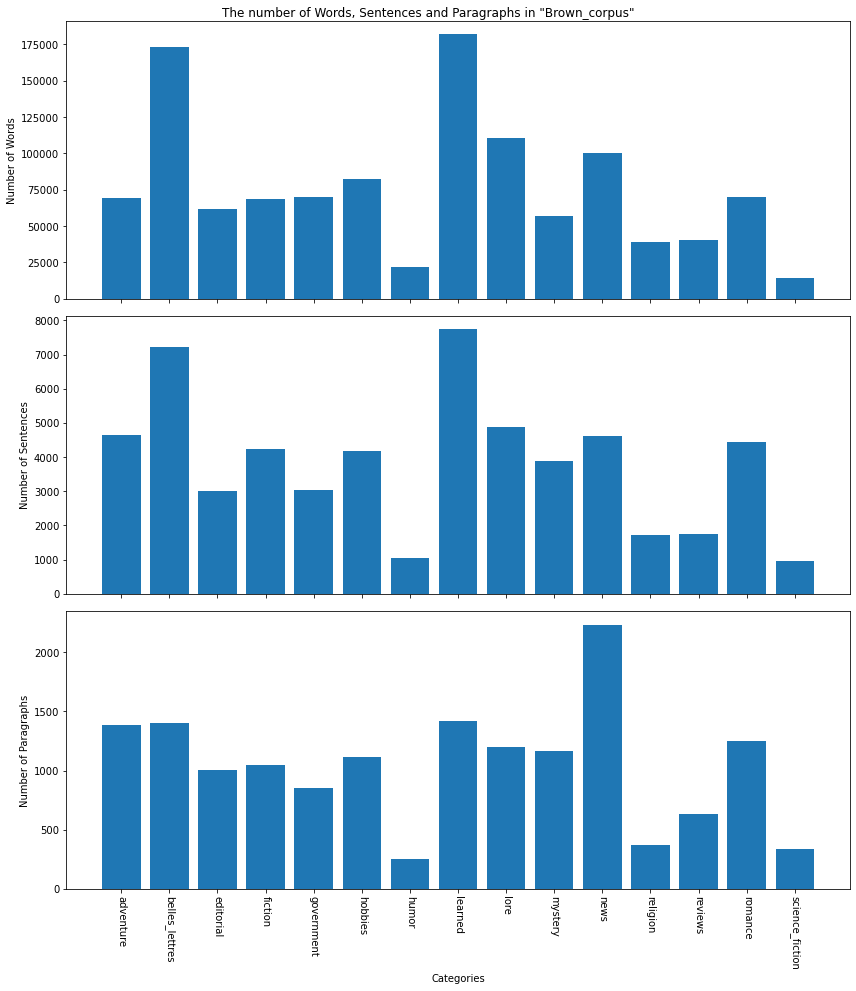

In [13]:
# the barplots will now be all plotted on a single figure. they will 
# share x_axis label since it is the same for all 3 subplots
fig, axes = plt.subplots(3,1, figsize=(12,14),sharex=True)
fig.suptitle('The number of Words, Sentences and Paragraphs in "Brown_corpus"')

axes[0].bar(brown_corpus["category_name"], brown_corpus["count_words"])
axes[0].set(ylabel="Number of Words")
axes[0].tick_params(axis='x', rotation=-90)

axes[1].bar(brown_corpus["category_name"], brown_corpus["count_sentences"])
axes[1].set(ylabel="Number of Sentences")
axes[1].tick_params(axis='x', rotation=-90)

axes[2].bar(brown_corpus["category_name"], brown_corpus["count_paragraphs"])
axes[2].set(xlabel="Categories", ylabel="Number of Paragraphs")
axes[2].tick_params(axis='x', rotation=-90)

fig.tight_layout()
plt.show()

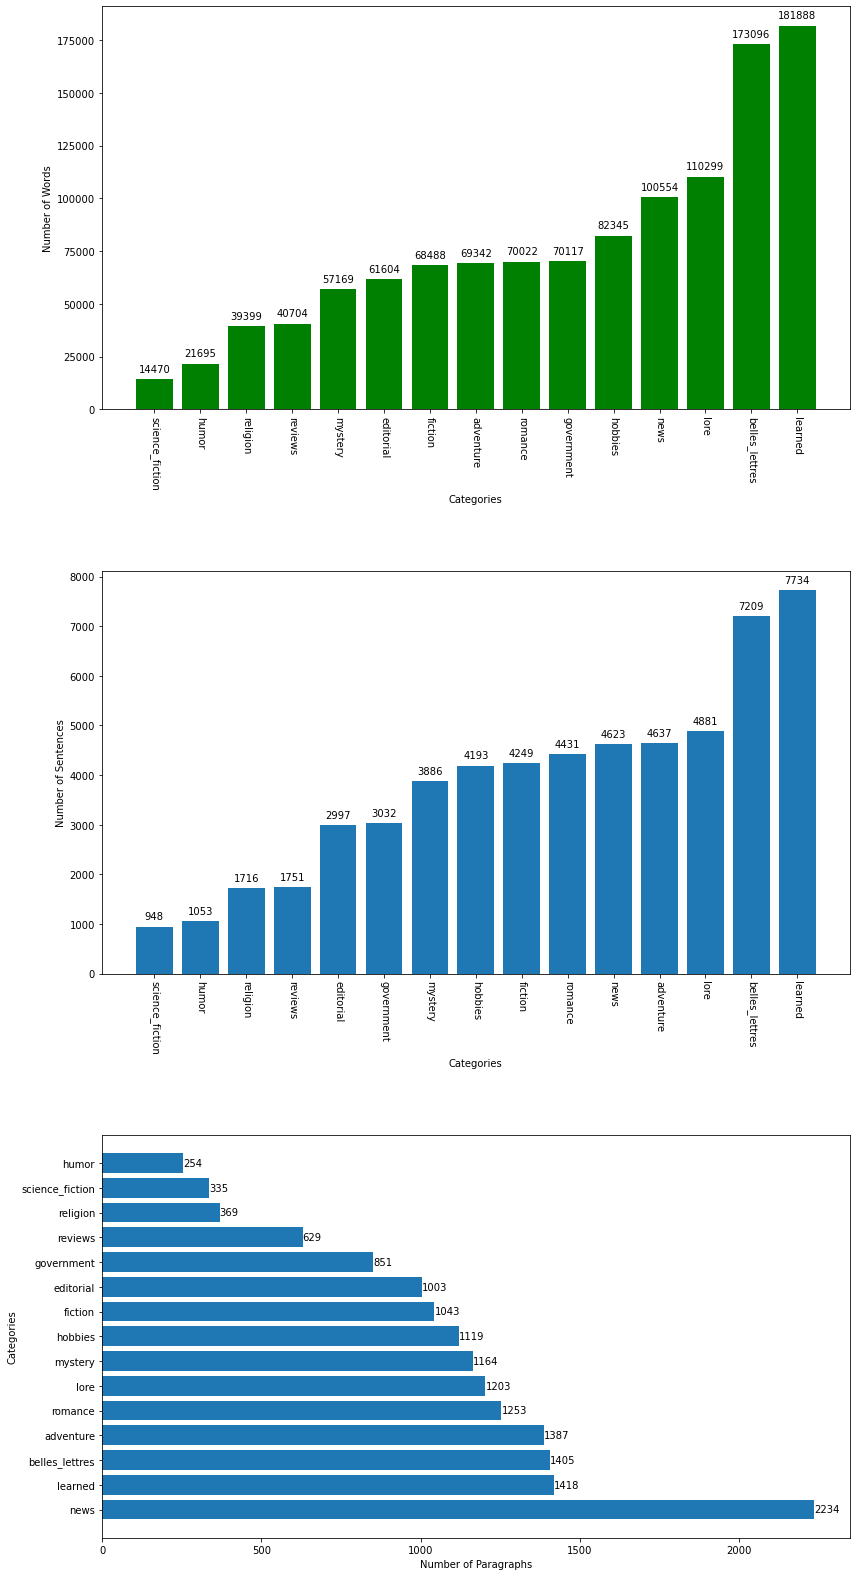

In [14]:
# function for labelling the bar charts with their counts at the top
def autolabel(rects, ax):
    for rect in rects:
        x = rect.get_x() + rect.get_width()/2.
        y = rect.get_height()
        ax.annotate("{}".format(y), (x,y), xytext=(0,5), textcoords="offset points",
                    ha='center', va='bottom')
        
# sort the brown dataframe for the three ascending plots
bc_count_asc = brown_corpus.sort_values(by="count_words",ascending=True)
bc_sentences_asc = brown_corpus.sort_values(by="count_sentences",ascending=True)
bc_paragraph_asc = brown_corpus.sort_values(by="count_paragraphs",ascending=False)

#we will now plot 3 subplots 
fig, axes = plt.subplots(3,1,figsize=(12,22))

#barplot for words
axes[0].bar(bc_count_asc["category_name"], bc_count_asc["count_words"],color='green')
axes[0].set(ylabel="Number of Words", xlabel="Categories")
axes[0].tick_params(axis='x', rotation=-90)
autolabel(axes[0].patches,axes[0])

# barplot for sentences
axes[1].bar(bc_sentences_asc["category_name"], bc_sentences_asc["count_sentences"])
axes[1].set(ylabel="Number of Sentences",xlabel="Categories")
axes[1].tick_params(axis='x', rotation=-90)
autolabel(axes[1].patches,axes[1])

# barplot for paragraphs
axes[2].barh(bc_paragraph_asc["category_name"], bc_paragraph_asc["count_paragraphs"])
axes[2].set(xlabel="Number of Paragraphs", ylabel="Categories")

for i, v in enumerate(bc_paragraph_asc["count_paragraphs"]):
    axes[2].text(v+0.2, i, str(round(v, 2)), color='black', va="center")

fig.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

### Heatmap

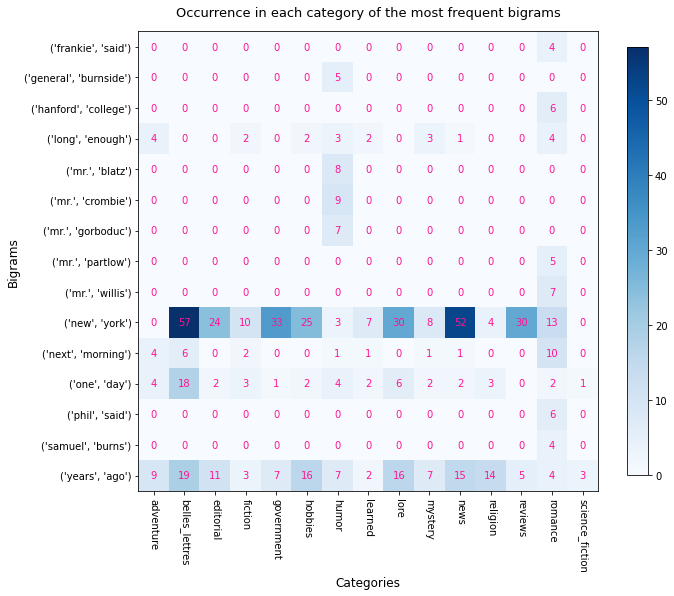

In [15]:
# 1- getting the heatmap data - 15 most frequent bigrams 
most_frequent = Counter(brown_bigrams).most_common(15)
most_frequent_bgrams = [i[0] for i in most_frequent]
freq_per_category = []

# calculating the frequency of 15 most common bigrams in each category
for category in brown_corpus["category_name"]:
    bigram = get_bigrams_frequency(brown.paras(categories=[category])) 
    # convert the most_frequent list to a dict object and set all values to 0.
    dict_most_frequent = dict.fromkeys(dict(most_frequent),0)
    # work our how many from "15 most frequent bigram" list are in this category
    for key, value in bigram.items():
        if key in dict_most_frequent.keys():
            dict_most_frequent[key]=value
    freq_per_category.append((category, list(dict_most_frequent.items())))

#create a dataframe with a column of all categories(we can add columns to it later)
df_heatmap = pd.DataFrame([i[0] for i in freq_per_category],columns=["categories"])

# now we set a column for each bigram in the "df_heatmap" 
for index, bigram in enumerate(most_frequent_bgrams):
    df_heatmap[bigram] = [item[1][index][1] for item in freq_per_category]
df_heatmap.set_index('categories',inplace=True)

# reformatting the "df_heatmap" so that we have bigrams as indexes and
# categories as columns and the values are the frequency of bigrams.
df_heatmap_unstack = df_heatmap.unstack().reset_index(name='values')
df_heatmap_unstack.rename(columns={"level_0": "bigram"},inplace=True)
df_heatmap_final = df_heatmap_unstack.pivot("bigram","categories","values")

# 2- Plotting the heatmap 
fig, ax = plt.subplots(1,1,figsize=(10,10))
heatmap = ax.imshow(df_heatmap_final, cmap='Blues')
ax.set_title("Occurrence in each category of the most frequent bigrams",
             fontsize=13, pad=15)
ax.set_xlabel("Categories", fontsize=12)
ax.set_ylabel("Bigrams", fontsize=12)
ax.set_xticks([num for num in range(len(df_heatmap_final.columns))])
ax.set_xticklabels([category for category in df_heatmap_final.columns],rotation=-90)
ax.set_yticks([i for i in range(len(df_heatmap_final.index))])
ax.set_yticklabels([bigram for bigram in df_heatmap_final.index])

# 3- annotating the heatmap
# here I chose to annotate the heatmap to make it easier to read off values
# and compare. for this, we can iterate over all the values in dataframe and 
# keep track of the value coordinates and using this we can write the values as text
all_values = df_heatmap_final.values
for (x,y), value in np.ndenumerate(all_values):
    ax.text(y, x, value, ha="center", va="center", color="deeppink")

# 4- print the resulting heatmap
fig.tight_layout()
plt.subplots_adjust(top=0.85)
fig.colorbar(heatmap,shrink=0.85,spacing='proportional')
plt.show()